## Import

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from IPython.display import SVG
# from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

## Init

In [6]:
IMG_ROWS = 28
IMG_COLS = 28
NUM_CLASSES = 10
TEST_SIZE = 0.2
RANDOM_STATE = 42
#Model
NO_EPOCHS = 50
BATCH_SIZE = 128

In [7]:
import os
os.chdir("/content/drive/MyDrive/5_AIADVANCE/FashionMnist")
os.getcwd()

'/content/drive/.shortcut-targets-by-id/1WYkIM110xY1VpfnGHkdvas_3vSRNFR6S/5_AIADVANCE/FashionMnist'

## Load Data

In [8]:
train_file = "./Data/fashion-mnist_train.csv"
train_data = pd.read_csv(train_file)

## Processing

In [9]:
# Create a dictionary for each type of label
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

def get_classes_distribution(data):
    # Get the count for each label
    label_counts = data["label"].value_counts()

    # Get total number of samples
    total_samples = len(data)


    # Count the number of items in each class
    for i in range(len(label_counts)):
        label = labels[label_counts.index[i]]
        count = label_counts.values[i]
        percent = (count / total_samples) * 100
        print("{:<20s}:   {} or {}%".format(label, count, percent))

get_classes_distribution(train_data)

Pullover            :   6000 or 10.0%
Ankle Boot          :   6000 or 10.0%
Shirt               :   6000 or 10.0%
T-shirt/top         :   6000 or 10.0%
Dress               :   6000 or 10.0%
Coat                :   6000 or 10.0%
Sandal              :   6000 or 10.0%
Bag                 :   6000 or 10.0%
Sneaker             :   6000 or 10.0%
Trouser             :   6000 or 10.0%


In [10]:
# data preprocessing
def data_preprocessing(raw):
    out_y = keras.utils.to_categorical(raw.label, NUM_CLASSES)
    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, IMG_ROWS, IMG_COLS, 1)
    out_x = x_shaped_array / 255
    return out_x, out_y

In [11]:
# prepare the data
X, y = data_preprocessing(train_data)

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [13]:
print("Fashion MNIST train -  rows:",X_train.shape[0]," columns:", X_train.shape[1:4])
print("Fashion MNIST valid -  rows:",X_val.shape[0]," columns:", X_val.shape[1:4])

Fashion MNIST train -  rows: 48000  columns: (28, 28, 1)
Fashion MNIST valid -  rows: 12000  columns: (28, 28, 1)


## Model

In [26]:
# Khởi tạo một mô hình tuần tự
model = Sequential()

# Thêm lớp làm phẳng để chuyển đổi dữ liệu từ 2D thành 1D
model.add(Flatten(input_shape=(IMG_ROWS, IMG_COLS, 1)))

# Thêm các lớp kết nối đầy đủ với hàm kích hoạt ReLU
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [27]:
from keras.optimizers import Adam

# Khởi tạo trình tối ưu Adam với tốc độ học 0.0002 (ví dụ)
optimizer = Adam(learning_rate=0.0002)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Training

In [29]:
history = model.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=NO_EPOCHS,
    verbose=1,
    validation_data=(X_val,y_val),
)

Epoch 1/50
375/375 [==============================] - 2s 4ms/step - loss: 0.6852 - accuracy: 0.7766 - val_loss: 0.4729 - val_accuracy: 0.8397
Epoch 2/50
375/375 [==============================] - 1s 4ms/step - loss: 0.4418 - accuracy: 0.8466 - val_loss: 0.4433 - val_accuracy: 0.8407
Epoch 3/50
375/375 [==============================] - 1s 4ms/step - loss: 0.4005 - accuracy: 0.8590 - val_loss: 0.3931 - val_accuracy: 0.8619
Epoch 4/50
375/375 [==============================] - 2s 4ms/step - loss: 0.3728 - accuracy: 0.8692 - val_loss: 0.3860 - val_accuracy: 0.8612
Epoch 5/50
375/375 [==============================] - 2s 5ms/step - loss: 0.3531 - accuracy: 0.8760 - val_loss: 0.3646 - val_accuracy: 0.8695
Epoch 6/50
375/375 [==============================] - 1s 4ms/step - loss: 0.3362 - accuracy: 0.8809 - val_loss: 0.3600 - val_accuracy: 0.8715
Epoch 7/50
375/375 [==============================] - 1s 4ms/step - loss: 0.3227 - accuracy: 0.8848 - val_loss: 0.3700 - val_accuracy: 0.8711
Epoch 

## Evaluate

In [30]:
score = model.evaluate(X_val,y_val,verbose=0)
print('val Loss : {:.4f}'.format(score[0]))
print('val Accuracy : {:.4f}'.format(score[1]))

val Loss : 0.3554
val Accuracy : 0.8951


Text(0.5, 1.0, 'Train - Accuracy')

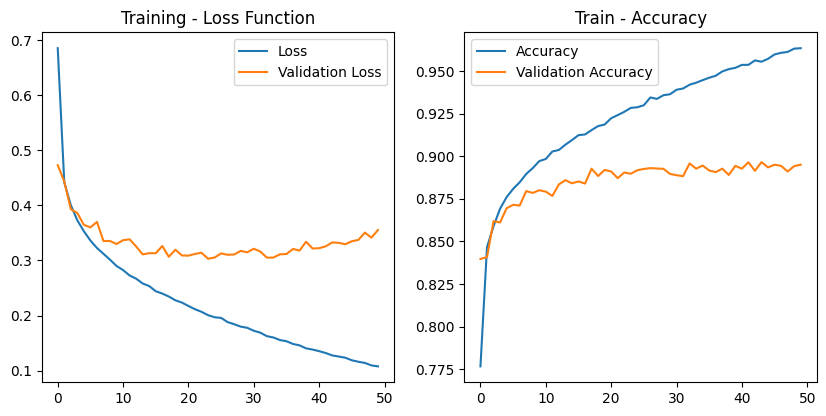

In [31]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [32]:
predicted_classes = model.predict(X_val)

375/375 [==============================] - 1s 1ms/step


In [33]:
from sklearn.metrics import classification_report

# Dự đoán nhãn cho dữ liệu validation
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)

# Chuyển đổi one-hot encoded labels thành nhãn dạng scalar
y_true_classes = np.argmax(y_val, axis=1)

# Tính và hiển thị báo cáo phân loại
print(classification_report(y_true_classes, y_pred_classes))


375/375 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.81      0.88      0.85      1232
           1       0.99      0.98      0.98      1174
           2       0.84      0.85      0.84      1200
           3       0.89      0.90      0.89      1242
           4       0.76      0.86      0.81      1185
           5       0.96      0.97      0.96      1141
           6       0.82      0.63      0.71      1243
           7       0.97      0.95      0.96      1224
           8       0.97      0.97      0.97      1149
           9       0.97      0.97      0.97      1210

    accuracy                           0.90     12000
   macro avg       0.90      0.90      0.90     12000
weighted avg       0.90      0.90      0.89     12000

